In [4]:
cerealslgd <- read.csv("E:\\Rprog\\Working Files\\cereals.csv",
                header = TRUE,
                stringsAsFactors = FALSE,
                strip.white = FALSE ,
                sep = ',')

print(str(cerealslgd))

'data.frame':	73 obs. of  16 variables:
 $ name    : chr  "100%_Bran" "100%_Natural_Bran" "All-Bran" "All-Bran_with_Extra_Fiber" ...
 $ mfr     : chr  "N" "Q" "K" "K" ...
 $ type    : chr  "C" "C" "C" "C" ...
 $ calories: int  70 120 70 50 110 110 110 130 90 90 ...
 $ protein : int  4 3 4 4 2 2 2 3 2 3 ...
 $ fat     : int  1 5 1 0 2 2 0 2 1 0 ...
 $ sodium  : int  130 15 260 140 200 180 125 210 200 210 ...
 $ fiber   : num  10 2 9 14 1 1.5 1 2 4 5 ...
 $ carbo   : num  5 8 7 8 14 10.5 11 18 15 13 ...
 $ sugars  : int  6 8 5 0 8 10 14 8 6 5 ...
 $ potass  : int  280 135 320 330 -1 70 30 100 125 190 ...
 $ vitamins: int  25 0 25 25 25 25 25 25 25 25 ...
 $ shelf   : int  3 3 3 3 3 1 2 3 1 3 ...
 $ weight  : num  1 1 1 1 1 1 1 1.33 1 1 ...
 $ cups    : num  0.33 1 0.33 0.5 0.75 0.75 1 0.75 0.67 0.67 ...
 $ rating  : num  68.4 34 59.4 93.7 34.4 ...
NULL


In [5]:
library(dummies)

dummies-1.5.6 provided by Decision Patterns



In [6]:
print(head(cerealslgd))


                       name mfr type calories protein fat sodium fiber carbo
1                 100%_Bran   N    C       70       4   1    130  10.0   5.0
2         100%_Natural_Bran   Q    C      120       3   5     15   2.0   8.0
3                  All-Bran   K    C       70       4   1    260   9.0   7.0
4 All-Bran_with_Extra_Fiber   K    C       50       4   0    140  14.0   8.0
5            Almond_Delight   R    C      110       2   2    200   1.0  14.0
6   Apple_Cinnamon_Cheerios   G    C      110       2   2    180   1.5  10.5
  sugars potass vitamins shelf weight cups   rating
1      6    280       25     3      1 0.33 68.40297
2      8    135        0     3      1 1.00 33.98368
3      5    320       25     3      1 0.33 59.42551
4      0    330       25     3      1 0.50 93.70491
5      8     -1       25     3      1 0.75 34.38484
6     10     70       25     1      1 0.75 29.50954


In [7]:
options(digits=5)
cerealslgd <- data.frame(cerealslgd$sodium,
         cerealslgd$fiber, 
         cerealslgd$carbo,
         cerealslgd$sugars, 
         cerealslgd$potass,
         cerealslgd$vitamins, 
         cerealslgd$rating)
                   
head(cerealslgd)

cerealslgd.sodium,cerealslgd.fiber,cerealslgd.carbo,cerealslgd.sugars,cerealslgd.potass,cerealslgd.vitamins,cerealslgd.rating
130,10.0,5.0,6,280,25,68.403
15,2.0,8.0,8,135,0,33.984
260,9.0,7.0,5,320,25,59.426
140,14.0,8.0,0,330,25,93.705
200,1.0,14.0,8,-1,25,34.385
180,1.5,10.5,10,70,25,29.510


In [8]:
library("dplyr")



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [9]:
cerealslgd_new <- select(cerealslgd, 
      Sodium = cerealslgd.sodium,
      Fiber = cerealslgd.fiber,
      Carbo = cerealslgd.carbo,
      Sugars = cerealslgd.sugars,
      Potas = cerealslgd.potass,
      Vitamins = cerealslgd.vitamins,
      LGD_Rating = cerealslgd.rating)     

head(cerealslgd_new)

Sodium,Fiber,Carbo,Sugars,Potas,Vitamins,LGD_Rating
130,10.0,5.0,6,280,25,68.403
15,2.0,8.0,8,135,0,33.984
260,9.0,7.0,5,320,25,59.426
140,14.0,8.0,0,330,25,93.705
200,1.0,14.0,8,-1,25,34.385
180,1.5,10.5,10,70,25,29.510


In [10]:
cor(cerealslgd_new)

,Sodium,Fiber,Carbo,Sugars,Potas,Vitamins,LGD_Rating
Sodium,1.000000,-0.064607,0.361442,0.113153,-0.017804,0.362894,-0.407770
Fiber,-0.064607,1.000000,-0.353765,-0.164472,0.906248,-0.029772,0.599047
Carbo,0.361442,-0.353765,1.000000,-0.342098,-0.357726,0.260247,0.058037
Sugars,0.113153,-0.164472,-0.342098,1.000000,-0.017316,0.132850,-0.759798
Potas,-0.017804,0.906248,-0.357726,-0.017316,1.000000,0.027678,0.408775
Vitamins,0.362894,-0.029772,0.260247,0.132850,0.027678,1.000000,-0.245157
LGD_Rating,-0.407770,0.599047,0.058037,-0.759798,0.408775,-0.245157,1.000000


In [11]:
summary(cerealslgd_new)

     Sodium        Fiber           Carbo          Sugars          Potas      
 Min.   :  0   Min.   : 0.00   Min.   :-1.0   Min.   :-1.00   Min.   : -1.0  
 1st Qu.:130   1st Qu.: 0.00   1st Qu.:12.0   1st Qu.: 3.00   1st Qu.: 40.0  
 Median :180   Median : 1.50   Median :14.0   Median : 6.00   Median : 90.0  
 Mean   :160   Mean   : 2.11   Mean   :14.6   Mean   : 6.75   Mean   : 93.1  
 3rd Qu.:220   3rd Qu.: 3.00   3rd Qu.:17.0   3rd Qu.:11.00   3rd Qu.:115.0  
 Max.   :320   Max.   :14.00   Max.   :23.0   Max.   :15.00   Max.   :330.0  
    Vitamins       LGD_Rating  
 Min.   :  0.0   Min.   :18.0  
 1st Qu.: 25.0   1st Qu.:32.2  
 Median : 25.0   Median :40.4  
 Mean   : 28.4   Mean   :43.0  
 3rd Qu.: 25.0   3rd Qu.:51.6  
 Max.   :100.0   Max.   :93.7  

In [12]:
cereals_linearMod <- lm(cerealslgd_new$LGD_Rating ~ . , data=cerealslgd_new)

summary(cereals_linearMod)


Call:
lm(formula = cerealslgd_new$LGD_Rating ~ ., data = cerealslgd_new)

Residuals:
   Min     1Q Median     3Q    Max 
-9.780 -1.514  0.006  2.282 10.395 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 48.57806    2.53009   19.20  < 2e-16 ***
Sodium      -0.06009    0.00607   -9.90  1.1e-14 ***
Fiber        4.59152    0.48152    9.54  4.9e-14 ***
Carbo        0.74698    0.14033    5.32  1.3e-06 ***
Sugars      -1.62138    0.12477  -13.00  < 2e-16 ***
Potas       -0.04519    0.01579   -2.86   0.0056 ** 
Vitamins    -0.04861    0.02172   -2.24   0.0286 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.79 on 66 degrees of freedom
Multiple R-squared:  0.936,	Adjusted R-squared:  0.93 
F-statistic:  161 on 6 and 66 DF,  p-value: <2e-16


In [14]:
cereals_linearMod <- lm(cerealslgd_new$LGD_Rating ~ cerealslgd_new$Fiber + cerealslgd_new$Sugars , data=cerealslgd_new)

summary(cereals_linearMod)


Call:
lm(formula = cerealslgd_new$LGD_Rating ~ cerealslgd_new$Fiber + 
    cerealslgd_new$Sugars, data = cerealslgd_new)

Residuals:
   Min     1Q Median     3Q    Max 
-12.18  -4.39  -1.02   2.71  16.27 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             51.534      1.599   32.24  < 2e-16 ***
cerealslgd_new$Fiber     2.894      0.315    9.18  1.2e-13 ***
cerealslgd_new$Sugars   -2.170      0.169  -12.81  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.38 on 70 degrees of freedom
Multiple R-squared:  0.808,	Adjusted R-squared:  0.803 
F-statistic:  148 on 2 and 70 DF,  p-value: <2e-16


In [15]:
cereals_linearMod <- lm(cerealslgd_new$LGD_Rating ~ cerealslgd_new$Sodium + cerealslgd_new$Fiber+cerealslgd_new$Potas , data=cerealslgd_new)

summary(cereals_linearMod)


Call:
lm(formula = cerealslgd_new$LGD_Rating ~ cerealslgd_new$Sodium + 
    cerealslgd_new$Fiber + cerealslgd_new$Potas, data = cerealslgd_new)

Residuals:
   Min     1Q Median     3Q    Max 
-16.41  -7.42  -1.26   8.13  17.97 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            50.0135     2.8891   17.31  < 2e-16 ***
cerealslgd_new$Sodium  -0.0575     0.0132   -4.35  4.7e-05 ***
cerealslgd_new$Fiber    7.0448     1.1092    6.35  2.0e-08 ***
cerealslgd_new$Potas   -0.1360     0.0377   -3.61  0.00058 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.55 on 69 degrees of freedom
Multiple R-squared:  0.576,	Adjusted R-squared:  0.557 
F-statistic: 31.2 on 3 and 69 DF,  p-value: 7.37e-13


In [17]:
set.seed(100) 
trainingRowIndex <- sample(1:nrow(cerealslgd_new), 0.8*nrow(cerealslgd_new)) 
cereals_trainingData <- cerealslgd_new[trainingRowIndex, ] 
cereals_testData  <- cerealslgd_new[-trainingRowIndex, ]  

In [18]:
linearModtrData <- lm(LGD_Rating ~ ., data=cereals_trainingData) 
summary(linearModtrData)


Call:
lm(formula = LGD_Rating ~ ., data = cereals_trainingData)

Residuals:
   Min     1Q Median     3Q    Max 
-9.359 -1.749 -0.275  1.777 11.084 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 45.71131    2.92814   15.61  < 2e-16 ***
Sodium      -0.06489    0.00667   -9.73  3.2e-13 ***
Fiber        4.19946    0.52638    7.98  1.6e-10 ***
Carbo        0.89706    0.15945    5.63  7.9e-07 ***
Sugars      -1.48519    0.13581  -10.94  5.6e-15 ***
Potas       -0.02571    0.01770   -1.45    0.152    
Vitamins    -0.05690    0.02351   -2.42    0.019 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.72 on 51 degrees of freedom
Multiple R-squared:  0.939,	Adjusted R-squared:  0.931 
F-statistic:  130 on 6 and 51 DF,  p-value: <2e-16


In [19]:
distPred <- predict(linearModtrData, cereals_testData)

result1 <- data.frame(LGD_Rating = cereals_testData$LGD_Rating , PredLGD= distPred , diff = (cereals_testData$LGD_Rating-distPred))
head(result1)


,LGD_Rating,PredLGD,diff
1,68.403,66.223,2.18046
2,33.984,44.960,-10.97680
10,53.314,51.010,2.30349
16,41.445,40.758,0.68721
17,45.863,44.639,1.22392
26,31.436,31.090,0.34587


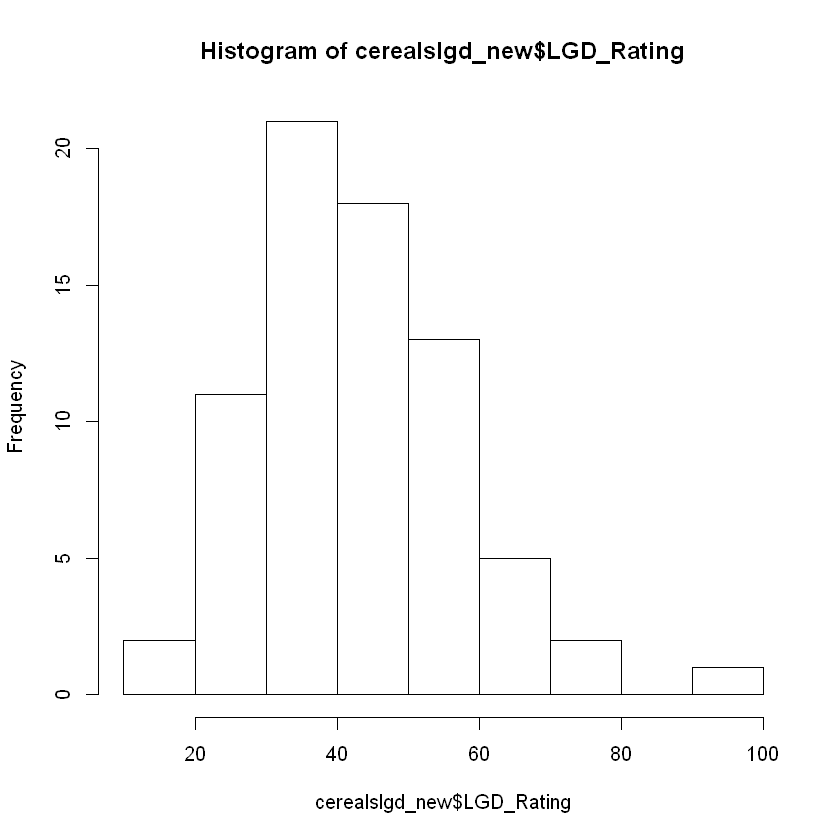

In [27]:
hist(cerealslgd_new$LGD_Rating)

In [32]:
cereals_linearModtrData <- lm(LGD_Rating ~ ., data=cereals_trainingData) 
summary(cereals_linearModtrData)


Call:
lm(formula = LGD_Rating ~ ., data = cereals_trainingData)

Residuals:
   Min     1Q Median     3Q    Max 
-9.359 -1.749 -0.275  1.777 11.084 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 45.71131    2.92814   15.61  < 2e-16 ***
Sodium      -0.06489    0.00667   -9.73  3.2e-13 ***
Fiber        4.19946    0.52638    7.98  1.6e-10 ***
Carbo        0.89706    0.15945    5.63  7.9e-07 ***
Sugars      -1.48519    0.13581  -10.94  5.6e-15 ***
Potas       -0.02571    0.01770   -1.45    0.152    
Vitamins    -0.05690    0.02351   -2.42    0.019 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.72 on 51 degrees of freedom
Multiple R-squared:  0.939,	Adjusted R-squared:  0.931 
F-statistic:  130 on 6 and 51 DF,  p-value: <2e-16


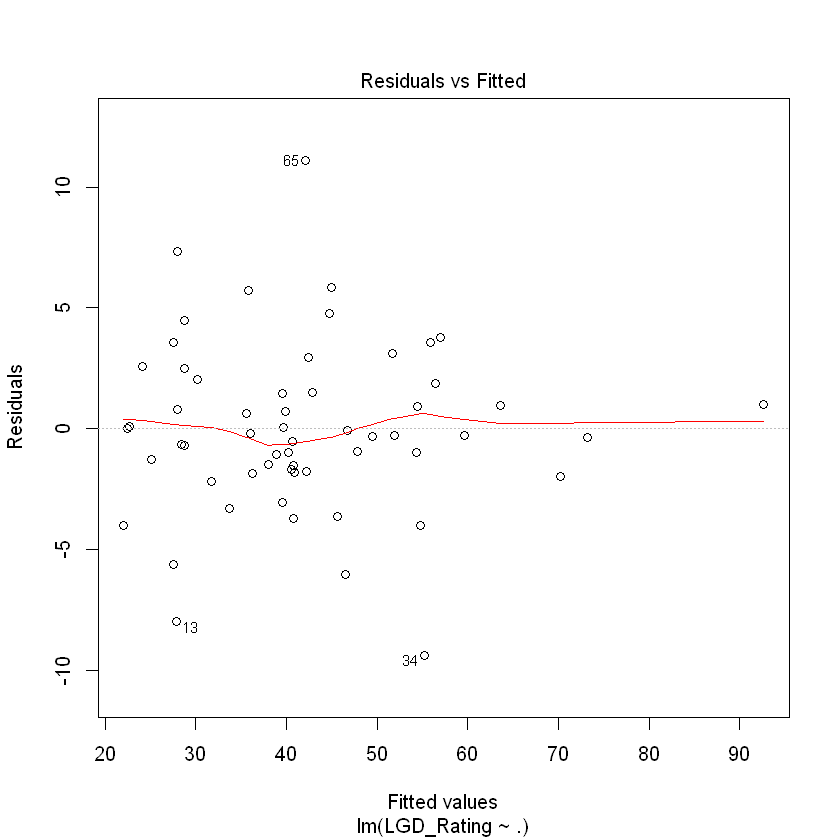

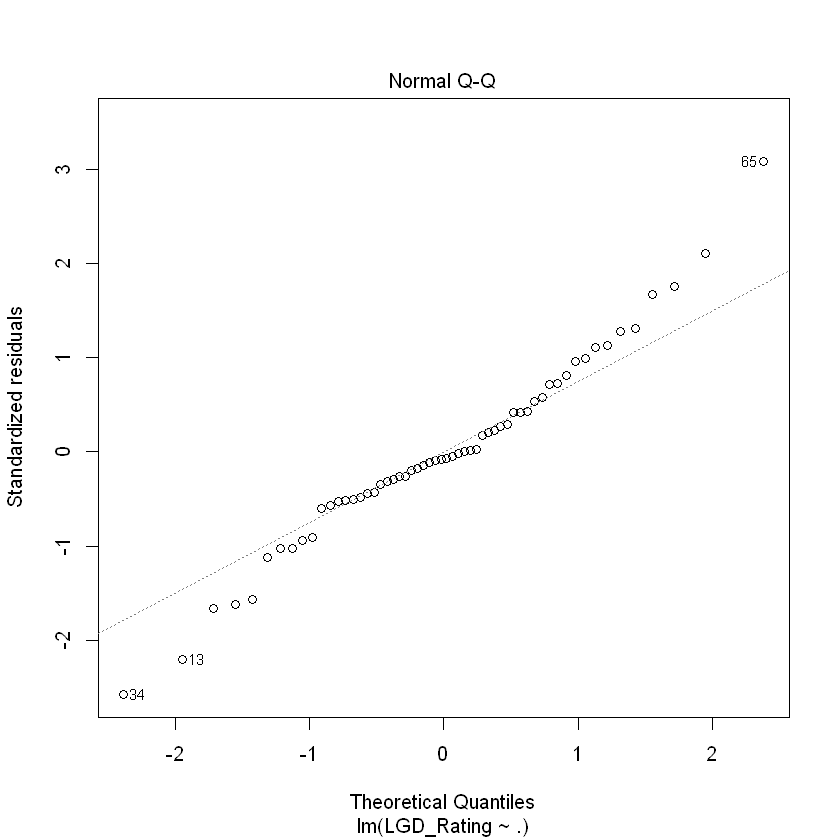

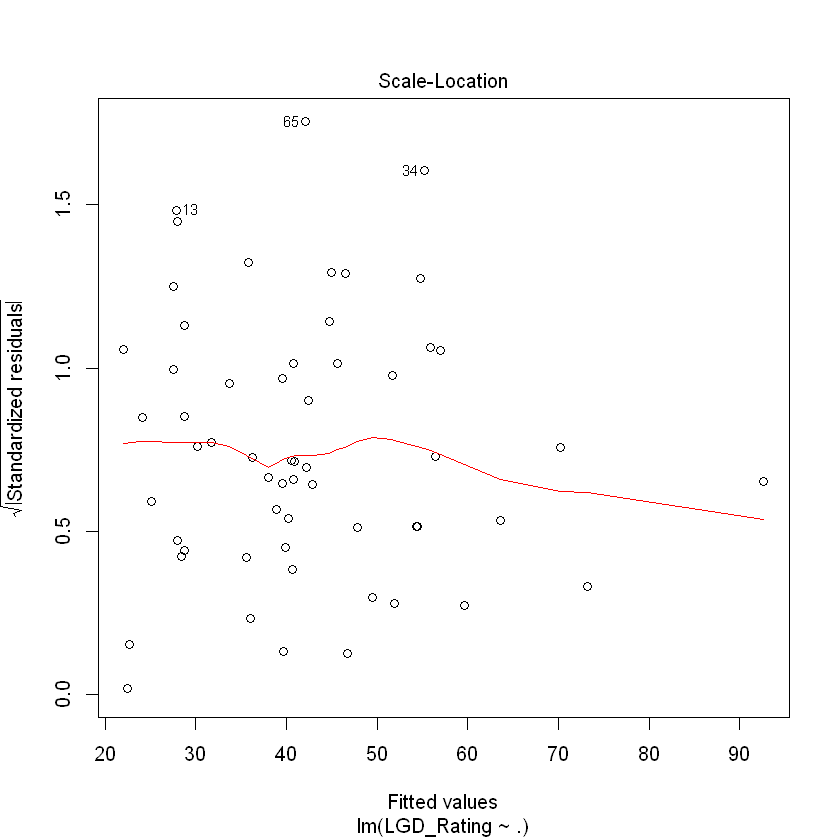

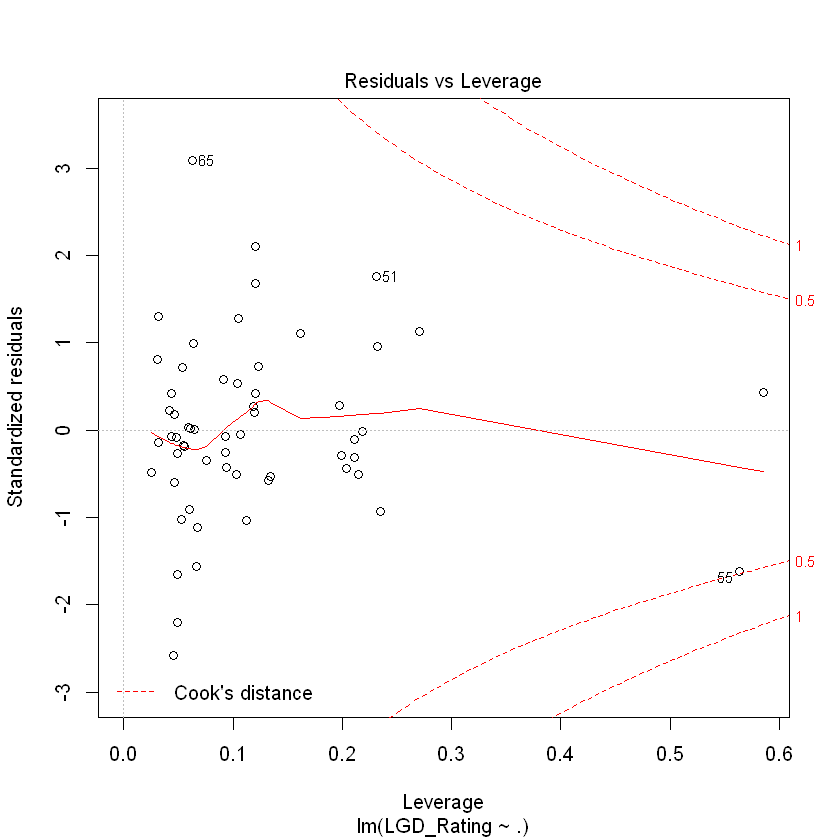

In [33]:
plot(cereals_linearModtrData)